In [1]:
import numpy as np
import matplotlib.pyplot
import xmitgcm
import xarray as xr

In [2]:
import warnings; warnings.filterwarnings("ignore")

In [3]:
run_dir = "/scratch2/tshahriar/v4soma_tapAdj_test_run_5975"

In [4]:
ds = xmitgcm.open_mdsdataset(
    run_dir,
    prefix = 'dynDiag',
    ref_date = '2025-01-01',
    delta_t = 1200,
)

In [5]:
ds.data_vars

Data variables:
    THETA    (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    PHIHYD   (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    SALT     (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    UVEL     (time, Z, YC, XG) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    VVEL     (time, Z, YG, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    WVEL     (time, Zl, YC, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    THETASQ  (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    UVELSQ   (time, Z, YC, XG) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    VVELSQ   (time, Z, YG, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    WVELSQ   (time, Zl, YC, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    PhiVEL   (time, Z, YC, XC) >f4 dask.array<chunksize=(1, 31, 62, 62), meta=np.n

In [6]:
ds.THETA

<xarray.DataArray 'THETA' (time: 1, Z: 31, YC: 62, XC: 62)>
dask.array<getitem, shape=(1, 31, 62, 62), dtype=>f4, chunksize=(1, 31, 62, 62), chunktype=numpy.ndarray>
Coordinates: (12/15)
    iter       (time) int64 360
  * time       (time) datetime64[ns] 2025-01-06
  * XC         (XC) >f4 -0.5 0.5 1.5 2.5 3.5 4.5 ... 56.5 57.5 58.5 59.5 60.5
  * YC         (YC) >f4 14.5 15.5 16.5 17.5 18.5 ... 71.5 72.5 73.5 74.5 75.5
  * Z          (Z) >f4 -5.0 -15.66 -27.75 ... -2.549e+03 -2.897e+03 -3.291e+03
    rA         (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    ...         ...
    hFacC      (Z, YC, XC) >f4 dask.array<chunksize=(31, 62, 62), meta=np.ndarray>
    maskC      (Z, YC, XC) bool dask.array<chunksize=(31, 62, 62), meta=np.ndarray>
    rhoRef     (Z) >f4 1.024e+03 1.024e+03 1.024e+03 ... 1.042e+03 1.043e+03
    maskCtrlC  (Z, YC, XC) bool dask.array<chunksize=(31, 62, 62), meta=np.ndarray>
    dxF        (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyF        (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

In [7]:
ds.THETA.time # here the diagnostic are spit out at every five days. 1*5 = 5 days || 30 days = 1 month || 360 days = 1 year

<xarray.DataArray 'time' (time: 1)>
array(['2025-01-06T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    iter     (time) int64 360
  * time     (time) datetime64[ns] 2025-01-06
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

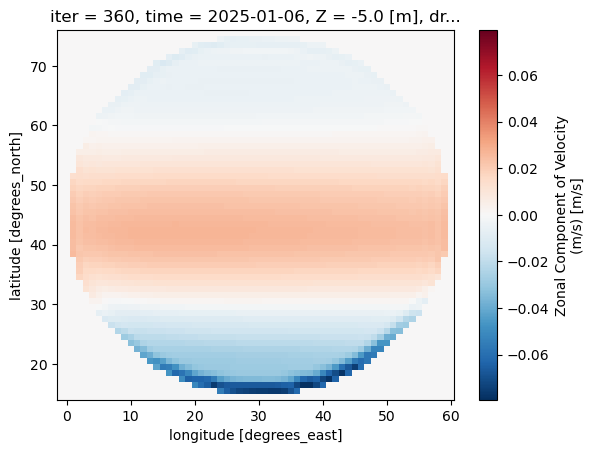

In [8]:
ds.UVEL.isel(time=0, Z=0).plot()

In [9]:
ds.time

<xarray.DataArray 'time' (time: 1)>
array(['2025-01-06T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    iter     (time) int64 360
  * time     (time) datetime64[ns] 2025-01-06
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

In [10]:
# ds.THETA.isel(Z=0, YC=31, XC=31).plot()

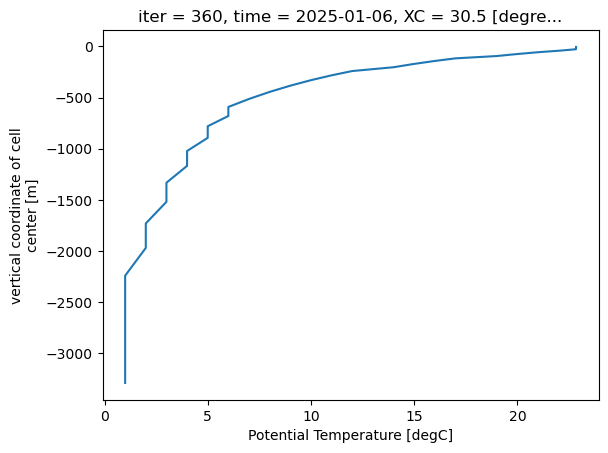

In [11]:
ds.THETA.isel(time=0, YC=31, XC=31).plot(y='Z')

In [12]:
# ds.THETA.isel(YC=31, XC=31).plot(y='Z', hue='time')

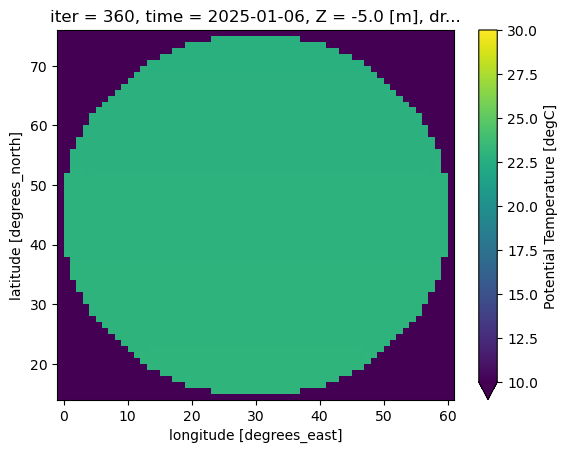

In [24]:
ds.THETA.isel(time=0, Z=0).plot(vmin=10, vmax=30) #this is 20 days (4*5) into the run

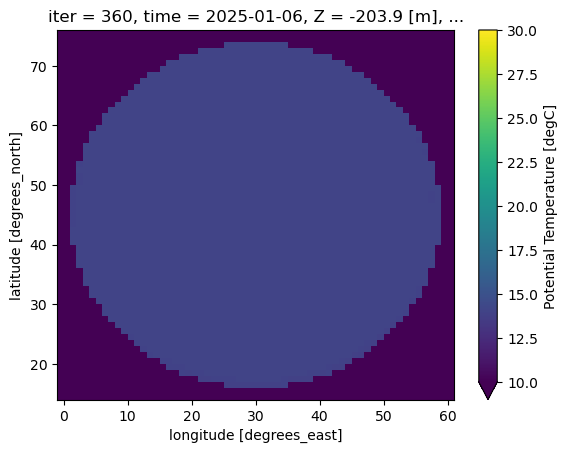

In [23]:
ds.THETA.isel(time=0, Z=10).plot(vmin=10, vmax=30)